# Iris Dataset Analysis - Data Processing and Exploration
- The Iris dataset is loaded using load_iris() from scikit-learn and converted to a pandas DataFrame.
- The dataset contains features: sepal length, sepal width, petal length, petal width, and species

## Data Preprocessing: Loading, Processing, and Exploration of Iris dataset
### a) Load the Dataset

In [38]:
# Import libraries
# type:ignore
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Preprocessing
**a) Handle missing values**

In [39]:
# Handle missing values (check only, Iris has none)
print("Missing values per column:")
print(df.isnull().sum(), "\n")

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64 



**b) Feature scaling**:
This step involves normalizing the feature values to a common scale, which can improve the performance of machine learning algorithms. Here, we use Min-Max scaling to transform the features to a range of [0, 1].

In [40]:
# Feature scaling
# type:ignore
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


**c) Encode class label**:
The categorical column is encoded using Label Encoding. This converts the species names into numerical labels, allowing the model to process the data more effectively.

In [41]:
# One hot encoding
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(df_scaled[['species']])
species_df = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['species']))
df_encoded = pd.concat([df_scaled.drop('species', axis=1), species_df], axis=1)
df_encoded.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_setosa,species_versicolor,species_virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0


### Data Exploration
**a) Summary statistics**

In [42]:
# Summary statistics
print("Summary statistics of the scaled dataset:")
df_scaled.describe()

Summary statistics of the scaled dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


**b) Visualization**:
Using a `pairplot` to visualize the relationships between features and a `correlation heatmap` to understand feature correlations.

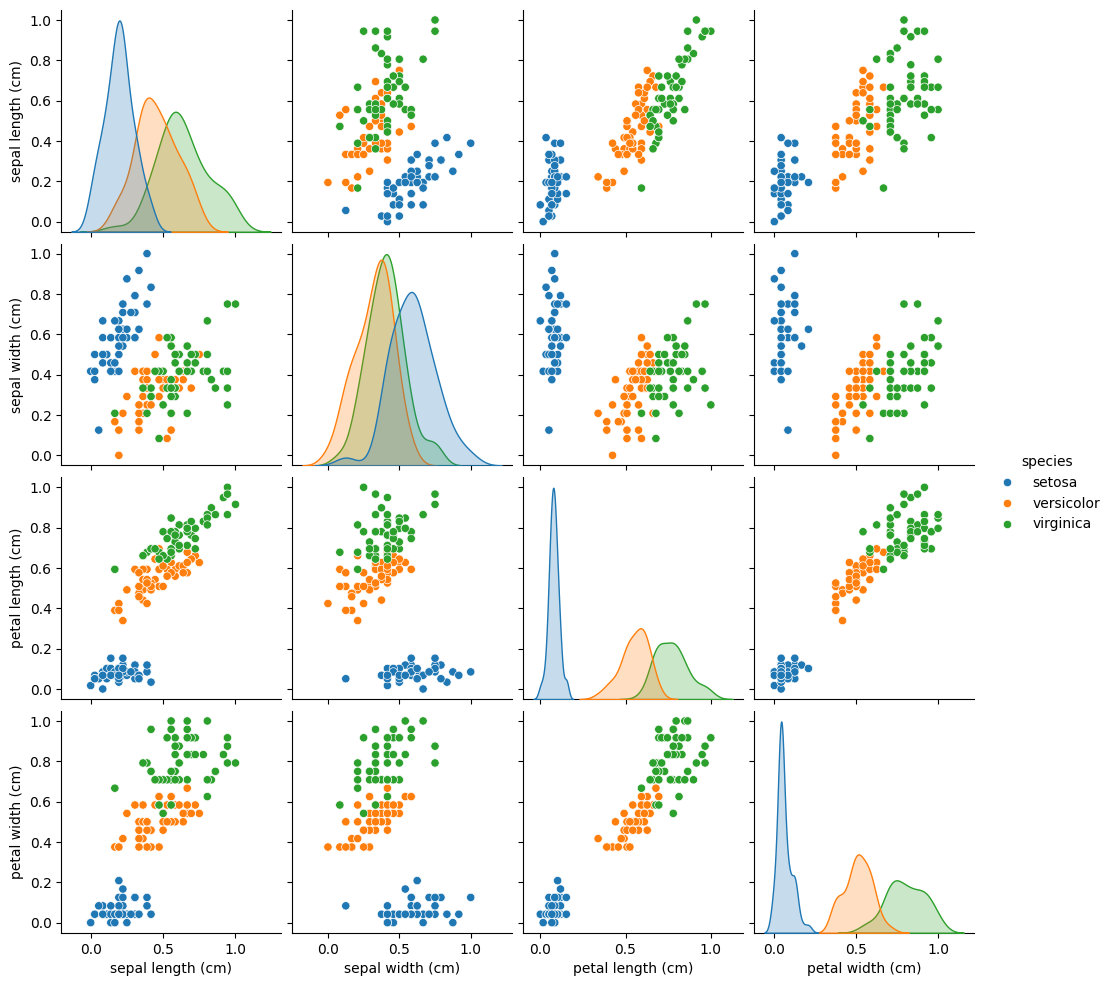

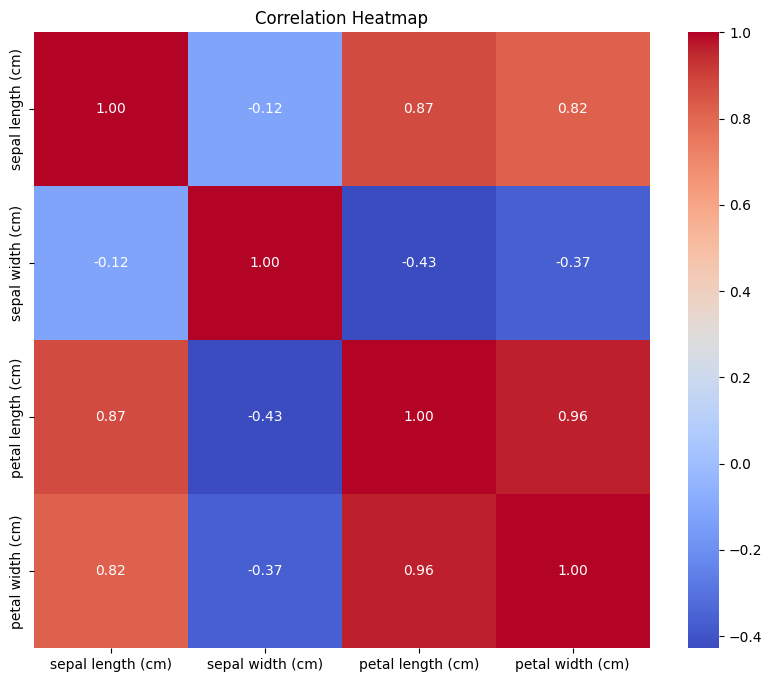

In [43]:
# Visualizing with Pairplot
# type: ignore
sns.pairplot(df_scaled, hue='species', diag_kind='kde')
plt.show()
plt.close()


# Visualizing with Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled[iris.feature_names].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()
plt.close()

Using a `boxplot` to visualize the distribution of features across different species and to identify potential outliers.

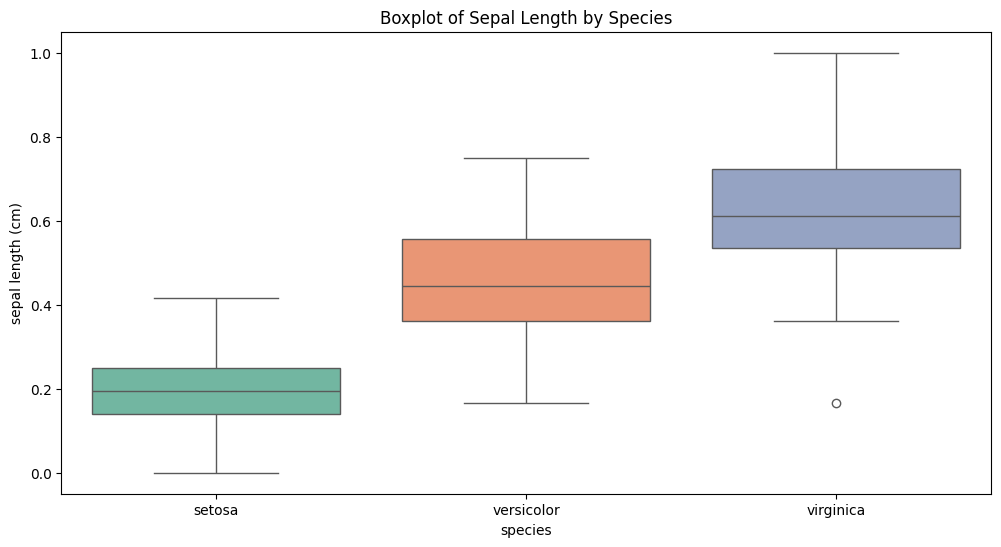

In [44]:
# Visualizing with Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled, x='species', y='sepal length (cm)', palette='Set2')
plt.title("Boxplot of Sepal Length by Species")
plt.show()
plt.close()

Handling the Outliers - by deleting the outlier rows

In [45]:
# Handling the Outliers
# type:ignore
# Remove outliers based on the IQR method
Q1 = df_scaled[iris.feature_names].quantile(0.25)
Q3 = df_scaled[iris.feature_names].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_scaled[~((df_scaled[iris.feature_names] < (Q1 - 1.5 * IQR)) | (df_scaled[iris.feature_names] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check for outliers
outliers = df_scaled[~df_scaled.index.isin(df_no_outliers.index)]
print("Outliers detected:")
print(outliers)

# Save the data without outliers
df_no_outliers.to_csv("iris_cleaned.csv", index=False)

Outliers detected:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15           0.388889          1.000000           0.084746          0.125000   
32           0.250000          0.875000           0.084746          0.000000   
33           0.333333          0.916667           0.067797          0.041667   
60           0.194444          0.000000           0.423729          0.375000   

       species  
15      setosa  
32      setosa  
33      setosa  
60  versicolor  


### Splitting the Data
- I will split the data into 80% training and 20% testing sets.
- Random state is set to 42 for reproducibility.

In [46]:
# type:ignore
from sklearn.model_selection import train_test_split

X = df_no_outliers[iris.feature_names]
y = df_no_outliers['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 116
Testing set size: 30


## Clustering
For the clustering analysis, I will use the KMeans algorithm to identify clusters within the dataset.
- Test different numbers of clusters (k) to find the optimal value.
- User Adjusted Rand Index (ARI) to evaluate clustering performance.
- k=3 shows the best performance, matching the actual number of species in the dataset.

In [47]:
# Fit KMeans with k=3 for the 3 species
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(X)

# Compare predicted clusters to actual species using Adjusted Rand Index (ARI)
ari_k3 = adjusted_rand_score(y, clusters_3)
print(f"Adjusted Rand Index (k=3): {ari_k3:.4f}")

Adjusted Rand Index (k=3): 0.7041


Try different numbers of clusters (k) to find the optimal value. `sanity check + sensitivity`.

- k=2 -> algorithm merges to two real species.
- k=4 -> over segmentation

In [48]:
# Try with different numbers of clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
ari_k2 = adjusted_rand_score(y, kmeans_2.fit_predict(X))

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
ari_k4 = adjusted_rand_score(y, kmeans_4.fit_predict(X))

print(f"Adjusted Rand Index (k=2): {ari_k2:.4f}")
print(f"Adjusted Rand Index (k=4): {ari_k4:.4f}")

Adjusted Rand Index (k=2): 0.5555
Adjusted Rand Index (k=4): 0.6072


Elbow curve - *inertia vs k*
- **Inertia** total within-cluster variance.
- As k increases, inertia decreases.
- Look for the "elbow" point where inertia reduction slows.

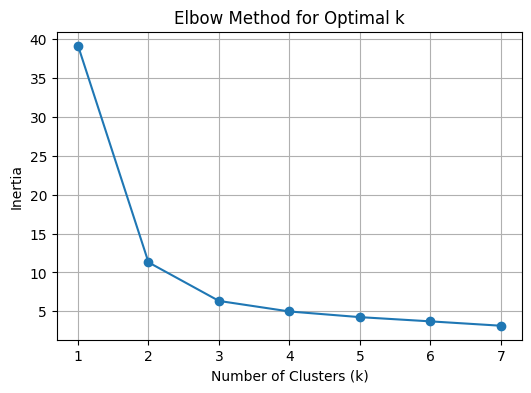

In [49]:
# Plotting an Elbow Curve
inertia_values = []
k_values = range(1, 8)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
# save in image folder
plt.savefig("images/elbow_curve.png")
plt.show()

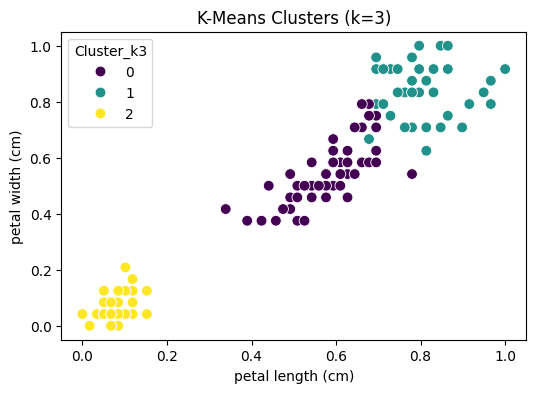

In [50]:
# Visualize Clusters (Petal Length vs Petal Width)
df_no_outliers['Cluster_k3'] = clusters_3

plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='Cluster_k3',
    palette='viridis',
    data=df_no_outliers,
    s=60
)
plt.title("K-Means Clusters (k=3)")
plt.show()

In [51]:
# --- Analysis ---
analysis_text = f"""
K-Means clustering with k=3 achieved an Adjusted Rand Index of {ari_k3:.4f}, showing high 
agreement with actual species labels. k=2 reduced ARI to {ari_k2:.4f}, meaning species distinctions 
were lost when merged into fewer groups. k=4 slightly lowered ARI to {ari_k4:.4f}, likely due to 
over-segmentation. The elbow curve confirms k=3 as optimal.

Cluster visualization of petal length vs. petal width reveals clear separation for Setosa, with 
some overlap between Versicolor and Virginica, explaining misclassifications. These overlaps 
arise because K-Means assumes spherical clusters with similar variance, which may not hold 
perfectly in biological datasets.

In practice, this approach is useful for tasks like customer segmentation, grouping products, or 
detecting patterns in unlabeled datasets. If synthetic or noisy data were used, ARI would likely 
decrease due to weaker cluster separation.
"""
print(analysis_text)


K-Means clustering with k=3 achieved an Adjusted Rand Index of 0.7041, showing high 
agreement with actual species labels. k=2 reduced ARI to 0.5555, meaning species distinctions 
were lost when merged into fewer groups. k=4 slightly lowered ARI to 0.6072, likely due to 
over-segmentation. The elbow curve confirms k=3 as optimal.

Cluster visualization of petal length vs. petal width reveals clear separation for Setosa, with 
some overlap between Versicolor and Virginica, explaining misclassifications. These overlaps 
arise because K-Means assumes spherical clusters with similar variance, which may not hold 
perfectly in biological datasets.

In practice, this approach is useful for tasks like customer segmentation, grouping products, or 
detecting patterns in unlabeled datasets. If synthetic or noisy data were used, ARI would likely 
decrease due to weaker cluster separation.



## Classification
This process will involve the following steps:
1. Train a Decision Tree classifier (scikit-learn) on the train set.
   - Predict on the test set; compute accuracy, precision, recall, F1-score.
   - Visualize the tree (using plot_tree).
2. Compare with another classifier (e.g., KNN with k=5); report which is better and why.

In [52]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

Decision Tree Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



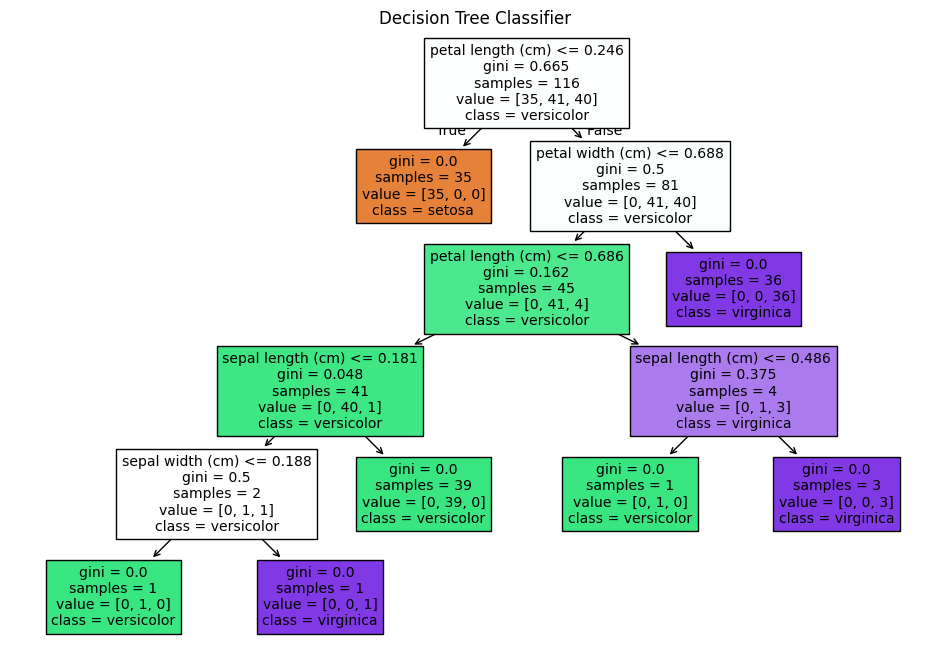

In [53]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()
plt.close()

* Comparing Decision Tree and KNN Classifiers

In [54]:
# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# Metrics for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Performance:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

KNN Performance:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [55]:
# Comparing Decision Tree and KNN Classifiers
print("Model Comparison:")
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, F1: {dt_f1:.4f}")
print(f"KNN           - Accuracy: {knn_accuracy:.4f}, F1: {knn_f1:.4f}")

if dt_accuracy > knn_accuracy:
    print("Decision Tree performed better overall, likely due to capturing feature interactions well.")
elif knn_accuracy > dt_accuracy:
    print("KNN performed better overall, possibly due to smooth decision boundaries for this dataset.")
else:
    print("Both models performed equally well on accuracy.")


Model Comparison:
Decision Tree - Accuracy: 0.9333, F1: 0.9333
KNN           - Accuracy: 0.9333, F1: 0.9333
Both models performed equally well on accuracy.
